3) EDA
3.1) Import necessary packages and load data

3.2) Explore data
    3.2.1) Categorical variables
    3.2.2) Numerical variables
    3.2.3) Target variable
        3.2.3.1) Target variables
        3.2.3.2) Target variables across Gender
        3.2.3.3) Target variables across Country
        3.2.3.4) Target variables across Education and Age groups

3.3) Correlation
    3.3.1) Correlation matrix and heatmap
    3.3.2) bivariate chart 

3.4) PCA

## 3.1) Import packages and load data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Import more
from scipy.stats import pearsonr

In [3]:
# Read in the latest dataset
drug_1 = pd.read_csv('../data/drug_1.csv', index_col=0)
drug_1.head()

ID  Age_value  Gender_value  Education_value  Country_value  \
0   1    0.49788       0.48246         -0.05921        0.96082   
1   2   -0.07854      -0.48246          1.98437        0.96082   
2   3    0.49788      -0.48246         -0.05921        0.96082   
3   4   -0.95197       0.48246          1.16365        0.96082   
4   5    0.49788       0.48246          1.98437        0.96082   

   Ethnicity_value   Nscore   Escore   Oscore   Ascore  ...  Gender  \
0          0.12600  0.31287 -0.57545 -0.58331 -0.91699  ...  Female   
1         -0.31685 -0.67825  1.93886  1.43533  0.76096  ...    Male   
2         -0.31685 -0.46725  0.80523 -0.84732 -1.62090  ...    Male   
3         -0.31685 -0.14882 -0.80615 -0.01928  0.59042  ...  Female   
4         -0.31685  0.73545 -1.63340 -0.45174 -0.30172  ...  Female   

   Education_level                 Education Country          Ethnicity  \
0                6  Professional certificate      UK  Mixed-White/Asian   
1                9          Doctorate degree      UK              White   
2                6  Professional certificate      UK              White   
3                8            Masters degree      UK              White   
4                9          Doctorate degree      UK              White   

  Age_level Amyl_binary  Amyl_user Cannabis_binary Cannabis_user  
0         3    Non-user          0        Non-user             0  
1         2        User          1            User             1  
2         3    Non-user          0            User             1  
3         1    Non-user          0            User             1  
4         3    Non-user          0            User             1  

[5 rows x 26 columns]

In [4]:
drug_1.shape

(1885, 26)

## 3.2) Explore data
- We have 5 demographic features, 7 personality trait features, and two target variables. All of these are categorical. 
- For 5 personality trait features the number of categories is big and the dataset's owners have quantified them. Thus, we will explore these features as both categorical and numerical variables. 

### 3.2.1) Categorical variables

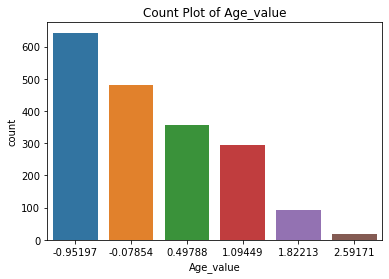

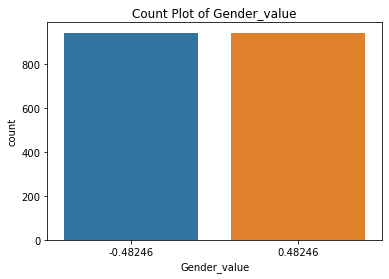

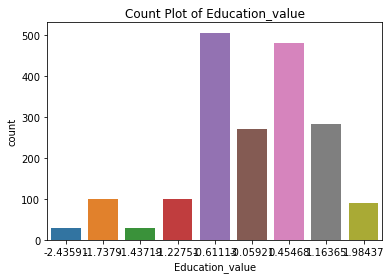

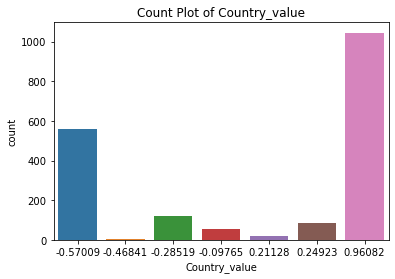

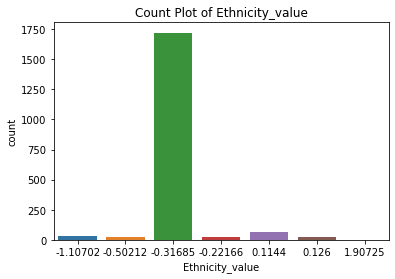

In [18]:
# Count plots of demographic features
varlist = ['Age_value', 'Gender_value', 'Education_value', 'Country_value', 'Ethnicity_value']
for var in varlist:
    title = 'Count Plot of ' + var
    sns.countplot(x=var, data=drug_1)
    plt.title(title)
    plt.show()

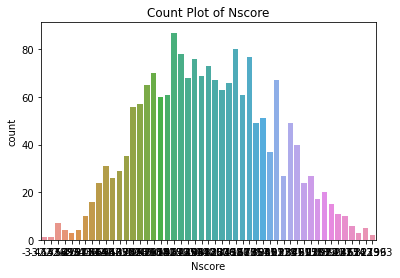

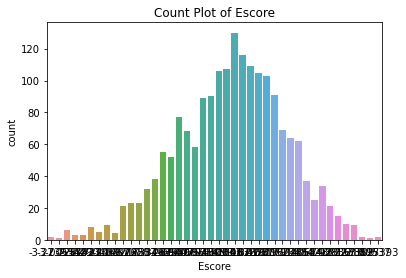

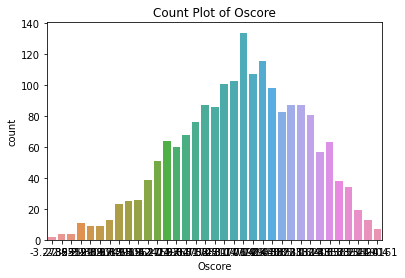

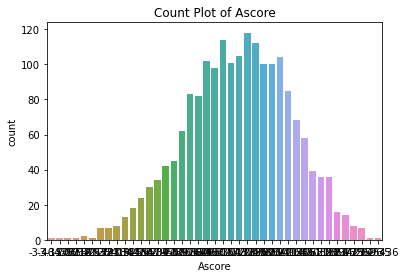

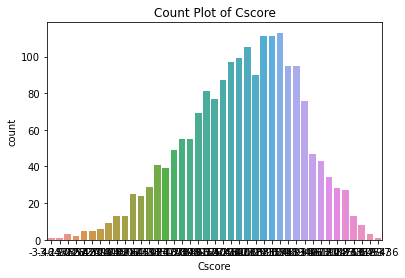

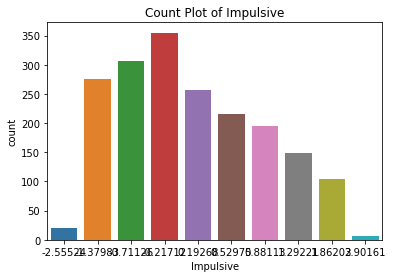

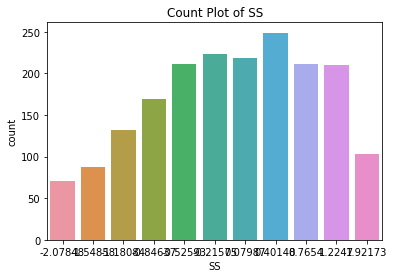

In [19]:
# Count plots of personality features
varlist = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
for var in varlist:
    sns.countplot(x=var, data=drug_1)
    plt.title('Count Plot of ' + var)
    plt.show()

In [29]:
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].describe()

Nscore       Escore       Oscore       Ascore       Cscore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean      0.000047    -0.000163    -0.000534    -0.000245    -0.000386   
std       0.998106     0.997448     0.996229     0.997440     0.997523   
min      -3.464360    -3.273930    -3.273930    -3.464360    -3.464360   
25%      -0.678250    -0.695090    -0.717270    -0.606330    -0.652530   
50%       0.042570     0.003320    -0.019280    -0.017290    -0.006650   
75%       0.629670     0.637790     0.723300     0.760960     0.584890   
max       3.273930     3.273930     2.901610     3.464360     3.464360   

         Impulsive           SS  
count  1885.000000  1885.000000  
mean      0.007216    -0.003292  
std       0.954435     0.963701  
min      -2.555240    -2.078480  
25%      -0.711260    -0.525930  
50%      -0.217120     0.079870  
75%       0.529750     0.765400  
max       2.901610     1.921730

In [30]:
# Check skewness
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].skew()

Nscore      -0.000059
Escore      -0.001738
Oscore      -0.010308
Ascore      -0.003897
Cscore      -0.005083
Impulsive    0.072795
SS          -0.040660
dtype: float64

### 3.2.2) Numerical variables
- Five features ('Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive') have many categories. We can consider them as numerical type. Let look explore them here.

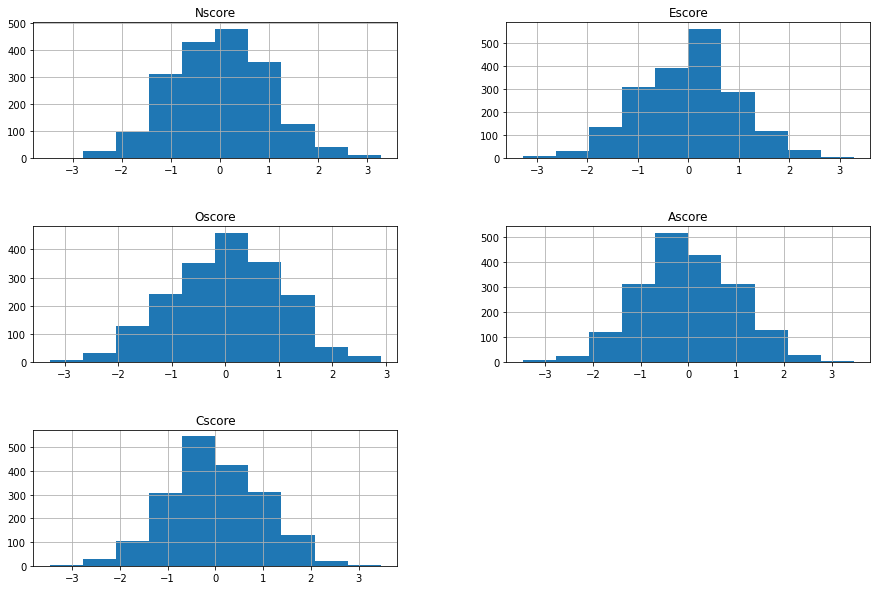

In [25]:
# Histogram
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:>

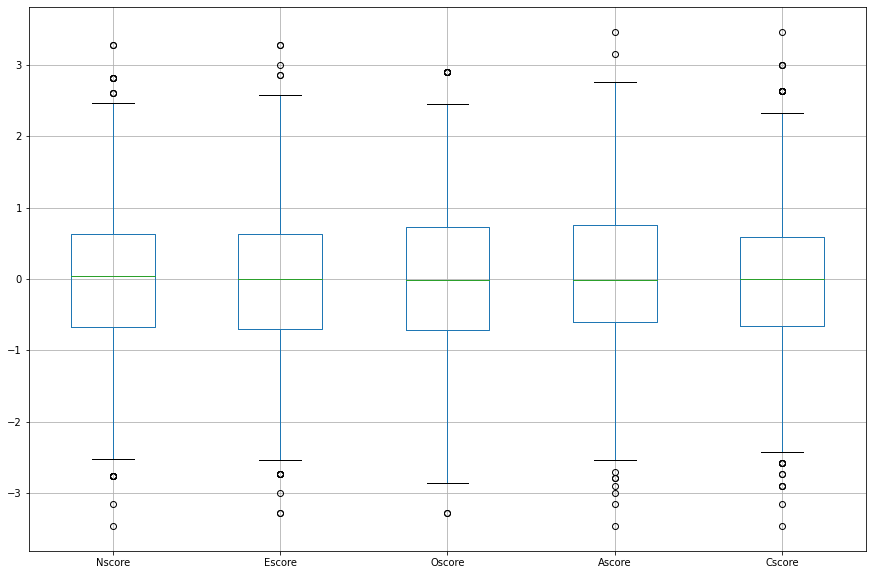

In [26]:
# Boxplot
drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']].boxplot(figsize=(15,10))
#plt.subplots_adjust(hspace=0.5);

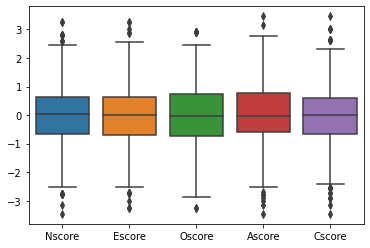

In [28]:
sns.boxplot(data=drug_1[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']]);

### 3.2.3) Target variables
- Originally, these variables have 7 categories. We have converted them into binary variables (User vs. Non-user).

#### 3.2.3.1) Target variables

In [39]:
drug_1['Amyl'].value_counts().sort_index()

CL0    1305
CL1     210
CL2     237
CL3      92
CL4      24
CL5      14
CL6       3
Name: Amyl, dtype: int64

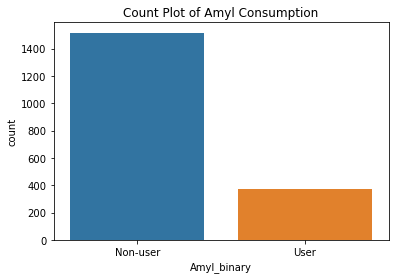

In [35]:
sns.countplot(x='Amyl_binary', data=drug_1)
plt.title('Count Plot of Amyl Consumption');

In [38]:
drug_1['Cannabis'].value_counts().sort_index()

CL0    413
CL1    207
CL2    266
CL3    211
CL4    140
CL5    185
CL6    463
Name: Cannabis, dtype: int64

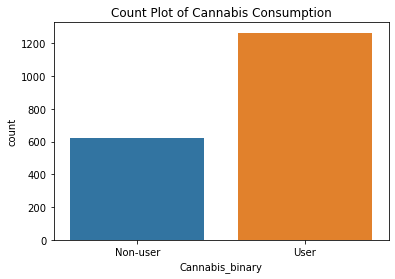

In [40]:
sns.countplot(x='Cannabis_binary', data=drug_1)
plt.title('Count Plot of Cannabis Consumption');

#### 3.2.3.2) Target variables across Gender

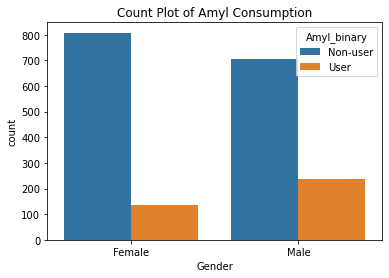

In [48]:
sns.countplot(x='Gender', hue='Amyl_binary', data=drug_1)
plt.title('Amyl Consumption by Gender');

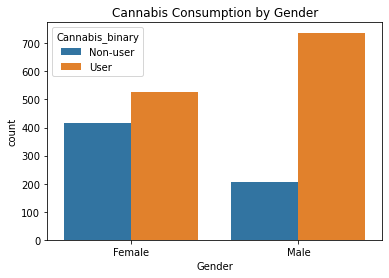

In [50]:
sns.countplot(x='Gender', hue='Cannabis_binary', data=drug_1)
plt.title('Cannabis Consumption by Gender');

#### 3.2.3.3) Target variables across Country

In [57]:
# Write a fucntion to do barplot
def plotbar(df, x_var, y_var, drug):
    sns.barplot(data=df, x=x_var, y=y_var)
    title = drug + " Consumption by " + x_var
    plt.title(title)

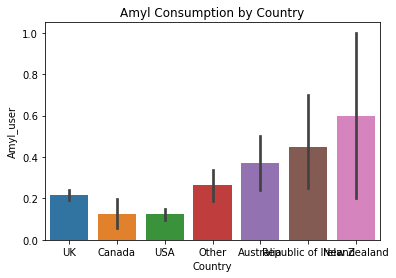

In [60]:
plotbar(drug_1, 'Country', 'Amyl_user', 'Amyl')

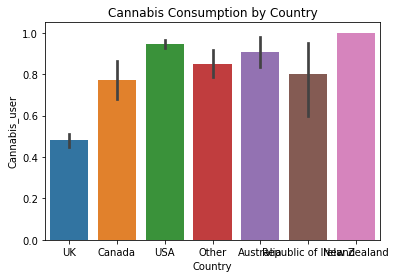

In [61]:
plotbar(drug_1, 'Country', 'Cannabis_user', 'Cannabis')

In [72]:
mean_usage = drug_1[['Country', 'Amyl_user', 'Cannabis_user']].groupby('Country').agg(['count','mean'])
mean_usage

Amyl_user           Cannabis_user          
                        count      mean         count      mean
Country                                                        
Australia                  54  0.370370            54  0.907407
Canada                     87  0.126437            87  0.770115
New Zealand                 5  0.600000             5  1.000000
Other                     118  0.262712           118  0.847458
Republic of Ireland        20  0.450000            20  0.800000
UK                       1044  0.217433          1044  0.479885
USA                       557  0.123878           557  0.946140

C:\Users\nguye\AppData\Local\Temp/ipykernel_35184/4002290453.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_usage.index, rotation=90)


Text(0, 0.5, 'Fraction that is User')

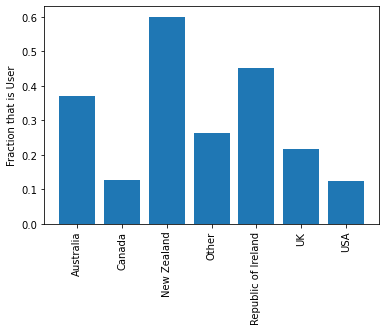

In [70]:
fix, ax = plt.subplots()
ax.bar(mean_usage.index, mean_usage.Amyl_user)
ax.set_xticklabels(mean_usage.index, rotation=90)
ax.set_ylabel("Fraction that is User")

#### 3.2.3.4) Target variables across Education and Age groups
- We will calculate correlation in the later section

In [73]:
mean_usage = drug_1[['Education', 'Amyl_user', 'Cannabis_user']].groupby('Education').agg(['count','mean'])
mean_usage

Amyl_user           Cannabis_user          
                               count      mean         count      mean
Education                                                             
Doctorate degree                  89  0.213483            89  0.539326
Left school at 16                 99  0.202020            99  0.555556
Left school at 17                 30  0.100000            30  0.766667
Left school at 18                100  0.170000           100  0.770000
Left school before 16             28  0.285714            28  0.714286
Masters degree                   283  0.187279           283  0.501767
Professional certificate         270  0.174074           270  0.574074
Some college but no degree       506  0.205534           506  0.895257
University degree                480  0.206250           480  0.608333

In [74]:
drug_1[['Education','Amyl_user','Cannabis_user']].groupby('Education').agg({'Amyl_user':['count','mean'],'Cannabis_user':'mean'})

Amyl_user           Cannabis_user
                               count      mean          mean
Education                                                   
Doctorate degree                  89  0.213483      0.539326
Left school at 16                 99  0.202020      0.555556
Left school at 17                 30  0.100000      0.766667
Left school at 18                100  0.170000      0.770000
Left school before 16             28  0.285714      0.714286
Masters degree                   283  0.187279      0.501767
Professional certificate         270  0.174074      0.574074
Some college but no degree       506  0.205534      0.895257
University degree                480  0.206250      0.608333

## 3.3) Correlation

### 3.3.1) Correlation matrix and heatmap

In [76]:
col_list = ['Age_value', 'Gender_value', 'Education_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Amyl_user', 'Cannabis_user']

<AxesSubplot:>

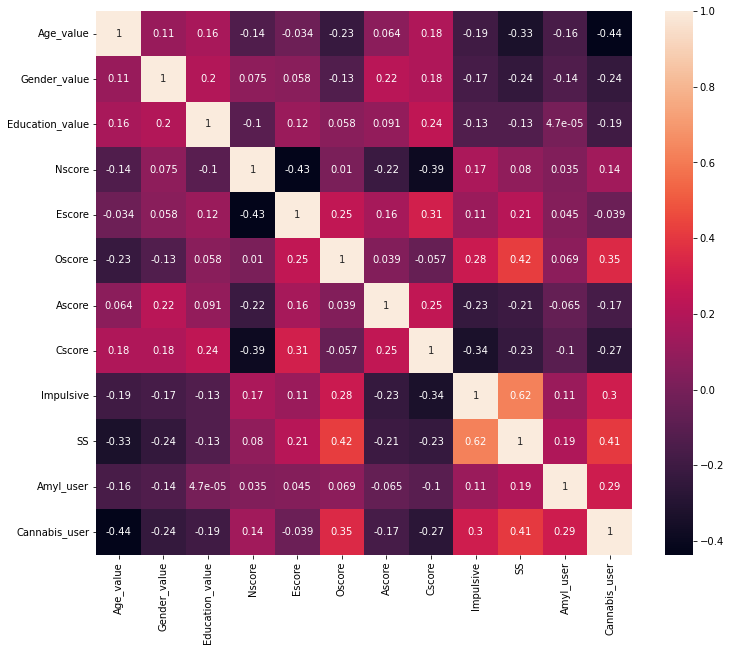

In [79]:
# Corrlation headmap
plt.subplots(figsize=(12,10))
sns.heatmap(drug_1[col_list].corr(), annot=True)

In [87]:
# Correlation matrix
drug_1[col_list].corr().round(2)

Age_value  Gender_value  Education_value  Nscore  Escore  \
Age_value             1.00          0.11             0.16   -0.14   -0.03   
Gender_value          0.11          1.00             0.20    0.07    0.06   
Education_value       0.16          0.20             1.00   -0.10    0.12   
Nscore               -0.14          0.07            -0.10    1.00   -0.43   
Escore               -0.03          0.06             0.12   -0.43    1.00   
Oscore               -0.23         -0.13             0.06    0.01    0.25   
Ascore                0.06          0.22             0.09   -0.22    0.16   
Cscore                0.18          0.18             0.24   -0.39    0.31   
Impulsive            -0.19         -0.17            -0.13    0.17    0.11   
SS                   -0.33         -0.24            -0.13    0.08    0.21   
Amyl_user            -0.16         -0.14             0.00    0.03    0.04   
Cannabis_user        -0.44         -0.24            -0.19    0.14   -0.04   

                 Oscore  Ascore  Cscore  Impulsive    SS  Amyl_user  \
Age_value         -0.23    0.06    0.18      -0.19 -0.33      -0.16   
Gender_value      -0.13    0.22    0.18      -0.17 -0.24      -0.14   
Education_value    0.06    0.09    0.24      -0.13 -0.13       0.00   
Nscore             0.01   -0.22   -0.39       0.17  0.08       0.03   
Escore             0.25    0.16    0.31       0.11  0.21       0.04   
Oscore             1.00    0.04   -0.06       0.28  0.42       0.07   
Ascore             0.04    1.00    0.25      -0.23 -0.21      -0.07   
Cscore            -0.06    0.25    1.00      -0.34 -0.23      -0.10   
Impulsive          0.28   -0.23   -0.34       1.00  0.62       0.11   
SS                 0.42   -0.21   -0.23       0.62  1.00       0.19   
Amyl_user          0.07   -0.07   -0.10       0.11  0.19       1.00   
Cannabis_user      0.35   -0.17   -0.27       0.30  0.41       0.29   

                 Cannabis_user  
Age_value                -0.44  
Gender_value             -0.24  
Education_value          -0.19  
Nscore                    0.14  
Escore                   -0.04  
Oscore                    0.35  
Ascore                   -0.17  
Cscore                   -0.27  
Impulsive                 0.30  
SS                        0.41  
Amyl_user                 0.29  
Cannabis_user             1.00

In [85]:
# Matrix for significane level of corr coefficient

# stackoverflow code
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(drug_1[col_list])

Age_value Gender_value Education_value  Nscore  Escore  \
Age_value             0.0          0.0             0.0     0.0  0.1418   
Gender_value          0.0          0.0             0.0  0.0012   0.012   
Education_value       0.0          0.0             0.0     0.0     0.0   
Nscore                0.0       0.0012             0.0     0.0     0.0   
Escore             0.1418        0.012             0.0     0.0     0.0   
Oscore                0.0          0.0          0.0118  0.6588     0.0   
Ascore             0.0058          0.0          0.0001     0.0     0.0   
Cscore                0.0          0.0             0.0     0.0     0.0   
Impulsive             0.0          0.0             0.0     0.0     0.0   
SS                    0.0          0.0             0.0  0.0005     0.0   
Amyl_user             0.0          0.0          0.9984  0.1297  0.0511   
Cannabis_user         0.0          0.0             0.0     0.0  0.0921   

                 Oscore  Ascore  Cscore Impulsive      SS Amyl_user  \
Age_value           0.0  0.0058     0.0       0.0     0.0       0.0   
Gender_value        0.0     0.0     0.0       0.0     0.0       0.0   
Education_value  0.0118  0.0001     0.0       0.0     0.0    0.9984   
Nscore           0.6588     0.0     0.0       0.0  0.0005    0.1297   
Escore              0.0     0.0     0.0       0.0     0.0    0.0511   
Oscore              0.0  0.0946  0.0136       0.0     0.0    0.0027   
Ascore           0.0946     0.0     0.0       0.0     0.0    0.0045   
Cscore           0.0136     0.0     0.0       0.0     0.0       0.0   
Impulsive           0.0     0.0     0.0       0.0     0.0       0.0   
SS                  0.0     0.0     0.0       0.0     0.0       0.0   
Amyl_user        0.0027  0.0045     0.0       0.0     0.0       0.0   
Cannabis_user       0.0     0.0     0.0       0.0     0.0       0.0   

                Cannabis_user  
Age_value                 0.0  
Gender_value              0.0  
Education_value           0.0  
Nscore                    0.0  
Escore                 0.0921  
Oscore                    0.0  
Ascore                    0.0  
Cscore                    0.0  
Impulsive                 0.0  
SS                        0.0  
Amyl_user                 0.0  
Cannabis_user             0.0

In [84]:
pearsonr(drug_1.Age_value, drug_1.Cannabis_user)

(-0.43638567054385957, 1.7534649803898296e-88)

In [86]:
# Correlation with asterisks
# stackoverflow code
rho = drug_1[col_list].corr()
pval = drug_1[col_list].corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

Age_value Gender_value Education_value    Nscore    Escore  \
Age_value          1.0***      0.11***         0.16***  -0.14***     -0.03   
Gender_value      0.11***       1.0***          0.2***   0.07***    0.06**   
Education_value   0.16***       0.2***          1.0***   -0.1***   0.12***   
Nscore           -0.14***      0.07***         -0.1***    1.0***  -0.43***   
Escore              -0.03       0.06**         0.12***  -0.43***    1.0***   
Oscore           -0.23***     -0.13***          0.06**      0.01   0.25***   
Ascore            0.06***      0.22***         0.09***  -0.22***   0.16***   
Cscore            0.18***      0.18***         0.24***  -0.39***   0.31***   
Impulsive        -0.19***     -0.17***        -0.13***   0.17***   0.11***   
SS               -0.33***     -0.24***        -0.13***   0.08***   0.21***   
Amyl_user        -0.16***     -0.14***             0.0      0.03     0.04*   
Cannabis_user    -0.44***     -0.24***        -0.19***   0.14***    -0.04*   

                   Oscore    Ascore    Cscore Impulsive        SS Amyl_user  \
Age_value        -0.23***   0.06***   0.18***  -0.19***  -0.33***  -0.16***   
Gender_value     -0.13***   0.22***   0.18***  -0.17***  -0.24***  -0.14***   
Education_value    0.06**   0.09***   0.24***  -0.13***  -0.13***       0.0   
Nscore               0.01  -0.22***  -0.39***   0.17***   0.08***      0.03   
Escore            0.25***   0.16***   0.31***   0.11***   0.21***     0.04*   
Oscore             1.0***     0.04*   -0.06**   0.28***   0.42***   0.07***   
Ascore              0.04*    1.0***   0.25***  -0.23***  -0.21***  -0.07***   
Cscore            -0.06**   0.25***    1.0***  -0.34***  -0.23***   -0.1***   
Impulsive         0.28***  -0.23***  -0.34***    1.0***   0.62***   0.11***   
SS                0.42***  -0.21***  -0.23***   0.62***    1.0***   0.19***   
Amyl_user         0.07***  -0.07***   -0.1***   0.11***   0.19***    1.0***   
Cannabis_user     0.35***  -0.17***  -0.27***    0.3***   0.41***   0.29***   

                Cannabis_user  
Age_value            -0.44***  
Gender_value         -0.24***  
Education_value      -0.19***  
Nscore                0.14***  
Escore                 -0.04*  
Oscore                0.35***  
Ascore               -0.17***  
Cscore               -0.27***  
Impulsive              0.3***  
SS                    0.41***  
Amyl_user             0.29***  
Cannabis_user          1.0***

### 3.3.2) Bivariate charts

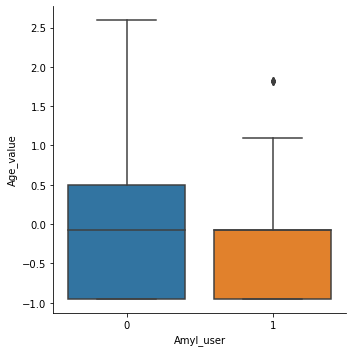

In [88]:
sns.catplot(x='Amyl_user', y='Age_value', data=drug_1, kind="box")

<AxesSubplot:xlabel='Amyl_user', ylabel='Age_value'>

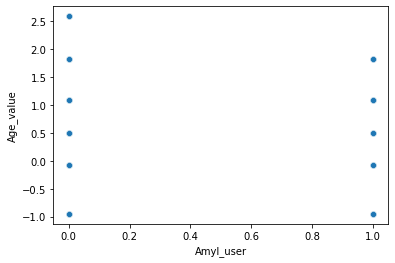

In [89]:
sns.scatterplot(x='Amyl_user', y='Age_value', data=drug_1)

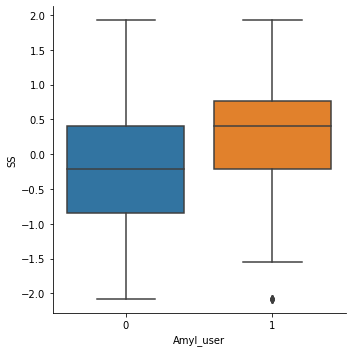

In [90]:
sns.catplot(x='Amyl_user', y='SS', data=drug_1, kind="box")

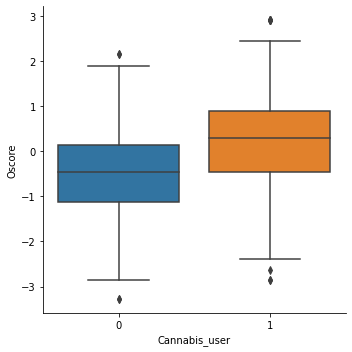

In [91]:
sns.catplot(x='Cannabis_user', y='Oscore', data=drug_1, kind="box")

In [ ]:
Start from here to do correlation 
Start from here to do correlation 
Start from here to do correlation 
heatmap
heatmap

In [16]:
drug_1.columns

Index(['ID', 'Age_value', 'Gender_value', 'Education_value', 'Country_value',
       'Ethnicity_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
       'Impulsive', 'SS', 'Amyl', 'Cannabis', 'Age', 'Gender',
       'Education_level', 'Education', 'Country', 'Ethnicity', 'Age_level',
       'Amyl_binary', 'Amyl_user', 'Cannabis_binary', 'Cannabis_user'],
      dtype='object')